In [1]:
import torch
import numpy as np

In [3]:
torch.randn(3, 4)

tensor([[ 1.1001,  1.1000,  0.1073, -0.6133],
        [ 0.6674, -0.4449,  0.4817, -1.7785],
        [-0.2322,  2.3272, -0.5196,  0.1155]])

## **Pytorch Dataset and Dataloaders:**
- We ideally want our dataset preparation code to be decoupled from our model training code for better readability and modularity.

- PyTorch provides two data primitives which helps us to do this with ease:

    - torch.utils.data.DataLoader
    - torch.utils.data.Dataset

What is Dataset?

- **Dataset** stores the samples and their corresponding labels (optionally)

What is DataLoader?

- **DataLoader** wraps an iterable around the Dataset to enable easy access to the samples.

In [4]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [5]:
X = torch.arange(0, 30)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [6]:
data = DataLoader(X)

In [7]:
for i in data:
    print(i)

tensor([0])
tensor([1])
tensor([2])
tensor([3])
tensor([4])
tensor([5])
tensor([6])
tensor([7])
tensor([8])
tensor([9])
tensor([10])
tensor([11])
tensor([12])
tensor([13])
tensor([14])
tensor([15])
tensor([16])
tensor([17])
tensor([18])
tensor([19])
tensor([20])
tensor([21])
tensor([22])
tensor([23])
tensor([24])
tensor([25])
tensor([26])
tensor([27])
tensor([28])
tensor([29])


In [8]:
data_2 = DataLoader(X, batch_size=5, shuffle=True)
for i in data_2:
    print(i)

tensor([ 5, 18,  6,  1, 25])
tensor([29, 22, 21, 13, 20])
tensor([12,  7,  9, 19,  3])
tensor([14, 17,  4, 28, 15])
tensor([24, 11,  8,  2, 26])
tensor([ 0, 16, 10, 23, 27])


In [9]:
import torch
from torchvision.datasets import MNIST

In [10]:
from torchvision import transforms

In [11]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [12]:
train_data = MNIST(root='data', train=True, download=True, transform=transforms)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [13]:
len(train_data)

60000

In [14]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [15]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [16]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 50

In [17]:
import numpy as np
from torch.utils.data import DataLoader

# data loader preparation
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [18]:
train_loader

In [19]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


tensor(4)


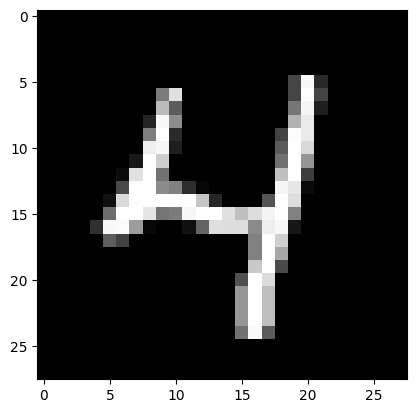

In [22]:
# Checking an sample image , data
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')
print(labels[2])

In [21]:
img_test = images[2]

In [23]:
img_test.shape

torch.Size([1, 28, 28])

# Architecture
We create a new class (which inherits the properties from the base class from nn package called Module) to define the archietecture of the Neural Network.

- Layer defination should be inside the constructor of the class.
- Forward propagation step should be included inside forward method.

Activations(Relu,Sigmoid,Tanh etc) and loss functions(cross entropy,nllloss etc) comes from torch.nn.functional module. This module contains all the functions in the torch.nn module.

In [28]:
from torch import nn, optim
import torch.nn.functional as F

Syntax of nn.Linear() is (input size, output size)

This NN architecture below represents the 784 nodes (28*28 pixels) in the input layer, 256 in the hidden layer, and 10 in the output layer(0-9 numbers). Inside the forward function, we will use the relu activation function in the hidden layer which present under torch.nn.functional module.

super().__init__() is a Python statement that calls the constructor (__init__) of a parent class.

In [38]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        # input tensor is flattened 
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [39]:
model = Model()

In [40]:
from torch import optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

- optimizer.zero_grad(): - will zero out the gradients from previous traning step , in this way gradients won't be accumulated. This should be done before calculating the gradients at each batch.
- criterion(output, target): - we feed in the model predicted values along with actual values to calculate the loss.
- optimizer.step(): Once we call loss.backward() , gradients will be calculated and we will use this gradients to update the weights in this step using the learning rate defined in optim.SGD(model.parameters(), lr=0.01).

In [41]:
for epoch in range(1, 11): ## run the model for 10 epochs
    train_loss = []
    
    ## training part 
    
    for data, target in train_loader:
        optimizer.zero_grad()
        ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = criterion(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss))

Epoch: 1 Training Loss:  0.5221063167601824
Epoch: 2 Training Loss:  0.2740491338695089
Epoch: 3 Training Loss:  0.2227673003822565
Epoch: 4 Training Loss:  0.18925680502473066
Epoch: 5 Training Loss:  0.16469240153674036
Epoch: 6 Training Loss:  0.14664381867274642
Epoch: 7 Training Loss:  0.13186753585158537
Epoch: 8 Training Loss:  0.11954140954185277
Epoch: 9 Training Loss:  0.10922725590644404
Epoch: 10 Training Loss:  0.10082267535074303


# **Creating the model with F.log_softmax + nn.NLLLoss()**

In [42]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [43]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [44]:
for epoch in range(1, 6): ## run the model for 5 epochs
    train_loss = []
    
    ## training part 
    
    for data, target in train_loader:
        optimizer.zero_grad()
        ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = criterion(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss))

Epoch: 1 Training Loss:  0.23836496979929506
Epoch: 2 Training Loss:  0.12048680858579852
Epoch: 3 Training Loss:  0.09605271527470904
Epoch: 4 Training Loss:  0.0804449472046205
Epoch: 5 Training Loss:  0.07305528366479848


In [47]:
# Calculate the class probabilities (softmax) for img
log_ps = model(img_test)
log_ps

tensor([[-2.4294e+01, -1.9577e+01, -2.3002e+01, -2.5171e+01, -1.1921e-07,
         -2.6311e+01, -1.8991e+01, -2.1624e+01, -2.0790e+01, -1.6279e+01]],
       grad_fn=<LogSoftmaxBackward0>)

In [48]:
# Calculate the class probabilities (softmax) for img
ps = torch.exp(log_ps)

In [49]:
ps

tensor([[2.8149e-11, 3.1471e-09, 1.0245e-10, 1.1704e-11, 1.0000e+00, 3.7420e-12,
         5.6533e-09, 4.0642e-10, 9.3515e-10, 8.5111e-08]],
       grad_fn=<ExpBackward0>)

In [50]:
top_p, top_class = ps.topk(1, dim=1)
top_p

tensor([[1.0000]], grad_fn=<TopkBackward0>)

In [51]:
top_class

tensor([[4]])

In [53]:
len(images)

50

In [55]:
log_ps = model(images)
ps = torch.exp(log_ps)
ps.shape

torch.Size([50, 10])

In [56]:
top_p, top_class = ps.topk(1, dim=1)

In [66]:
top_class[:10]

tensor([[6],
        [9],
        [4],
        [9],
        [6],
        [8],
        [8],
        [7],
        [2],
        [2]])

In [67]:
labels

tensor([6, 9, 4, 9, 6, 8, 8, 7, 2, 2, 7, 8, 5, 9, 3, 3, 5, 5, 0, 2, 6, 1, 8, 7,
        2, 1, 1, 2, 2, 4, 1, 5, 3, 1, 2, 2, 1, 3, 8, 1, 2, 8, 4, 1, 5, 6, 4, 5,
        2, 0])

In [68]:
top_class.shape

torch.Size([50, 1])

In [69]:
labels.shape

torch.Size([50])

In [72]:
matches = top_class == labels.view(*top_class.shape)

In [73]:
matches

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [77]:
accuracy = torch.mean(matches.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 100.0%
